In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xg
import pickle

In [2]:
df=pd.read_csv("/content/train-data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
#drop the index column, New_Price
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.drop('New_Price',axis = 1,inplace = True)

In [7]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [8]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
# Converting Engine, power from object dtype to numeric dtype
df['Engine']=df['Engine'].replace(" CC","",regex=True)
df['Power']=df['Power'].replace(" bhp","",regex=True)

In [11]:
df["Power"].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [12]:
df=df.replace("null",None,regex=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df = df.reset_index(drop=True)

In [15]:
df['Engine']=df['Engine'].astype('float64')
df['Power']=df['Power'].astype('float64')

In [16]:
#mileage column has 2 types of units
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Km/Kg : {} '.format(kmpl))

The number of rows with Km/Kg : 65 
The number of rows with Km/Kg : 5807 


In [17]:
#1 liter of mileage = 710 to 775 grams ~= 742.5
Correct_Mileage= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))
df['Mileage']=Correct_Mileage

In [18]:
df['Mileage'][0]

37.24

In [19]:
for i in range(df.shape[0]):
  df.at[i,'Company'] = df['Name'][i].split()[0]

In [20]:
k=df['Company'].unique()
print(sorted(k))

['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


In [21]:
df['Company'].replace("ISUZU","Isuzu",regex=True, inplace=True)

In [22]:
df.drop('Name',axis = 1,inplace = True)

In [23]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,17.74,Audi


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
 11  Company            5872 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [25]:
df.nunique()

Location               11
Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               161
Engine                139
Power                 368
Seats                   8
Price                1364
Company                29
dtype: int64

In [26]:
for i in df.columns :
  if len(df[i].unique()) < 30:
    print(i)
    print(sorted(df[i].unique()),"\n\n")

Location
['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'] 


Year
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] 


Fuel_Type
['CNG', 'Diesel', 'LPG', 'Petrol'] 


Transmission
['Automatic', 'Manual'] 


Owner_Type
['First', 'Fourth & Above', 'Second', 'Third'] 


Seats
[2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 


Company
['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'] 




Text(0, 0.5, 'Data types')

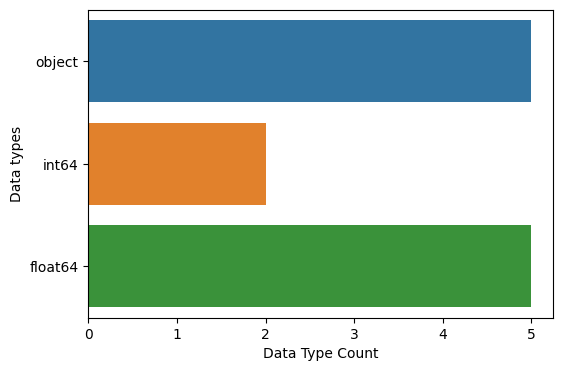

In [27]:
#check counts of the data types of the variables
plt.figure(figsize=(6,4))
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("Data Type Count")
plt.ylabel("Data types")

In [28]:
df.describe()
#Inferences:
#There is some skewness in data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.134156,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.695584,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.000000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.000000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.000000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,160.000000


In [29]:
#The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. 
#Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. 
#By skewed left, it means that the left tail is long relative to the right tail. 
#Similarly, skewed right means that the right tail is long relative to the left tail.

print('Skewness of the below features:')
print(df.skew())

Skewness of the below features:
Year                 -0.817982
Kilometers_Driven    58.456499
Mileage               0.596403
Engine                1.416879
Power                 1.916206
Seats                 1.915057
Price                 3.323089
dtype: float64


<ipython-input-29-275066a294a0>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


In [30]:
continous_num=['Kilometers_Driven','Mileage','Engine','Power','Price']
descrete_num=['Year','Seats']
categorical_var=['Location','Fuel_Type','Transmission','Owner_Type','Company']

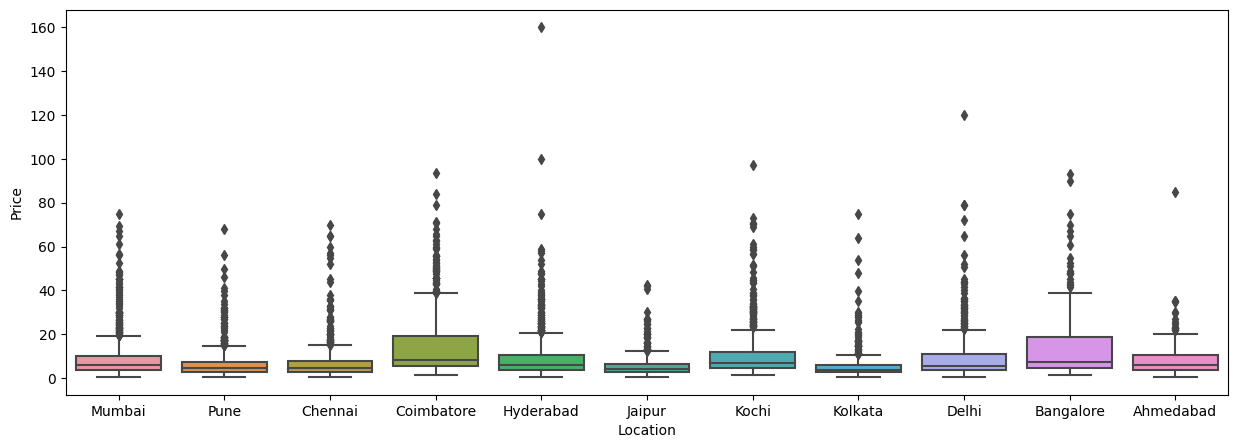

In [31]:
data = pd.concat([df['Price'], df['Location']], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x='Location', y="Price", data=data)
#fig.axis(ymin=0, ymax=165);

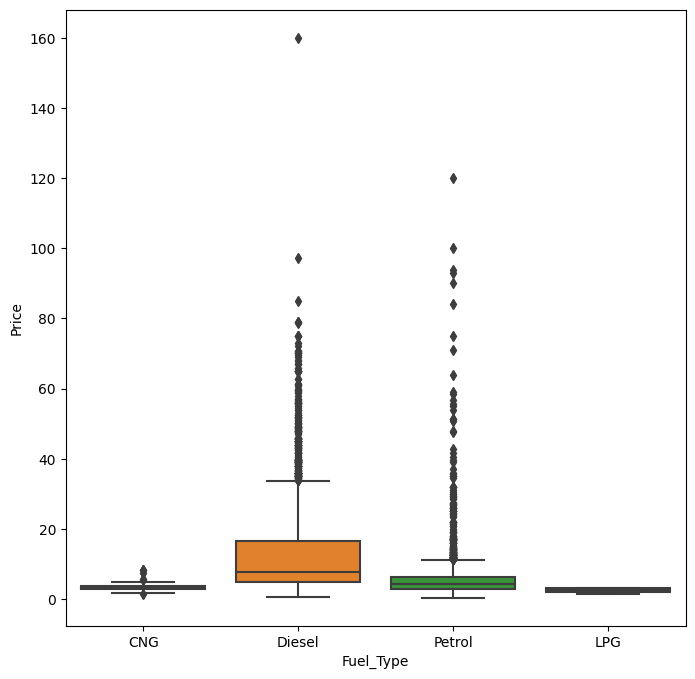

In [32]:
data = pd.concat([df['Price'], df['Fuel_Type']], axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x='Fuel_Type', y="Price", data=data)
#fig.axis(ymin=0, ymax=165);

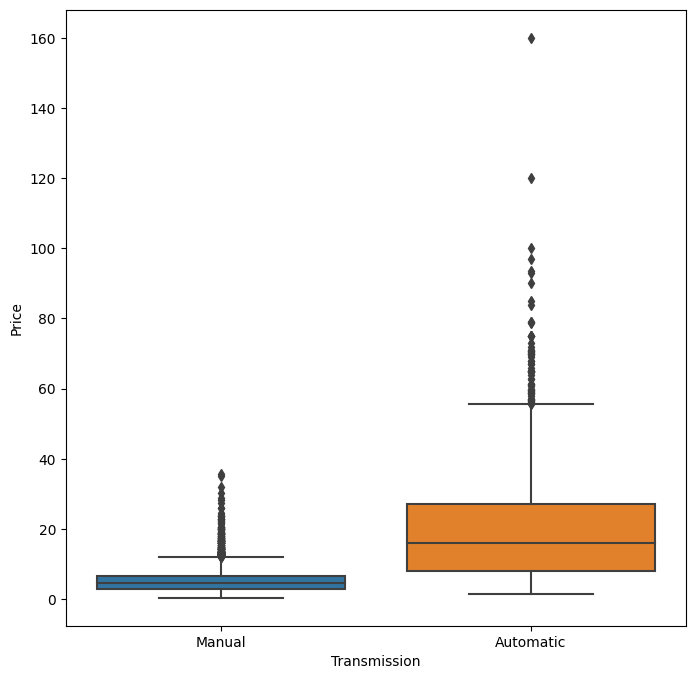

In [33]:
data = pd.concat([df['Price'], df['Transmission']], axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x='Transmission', y="Price", data=data)

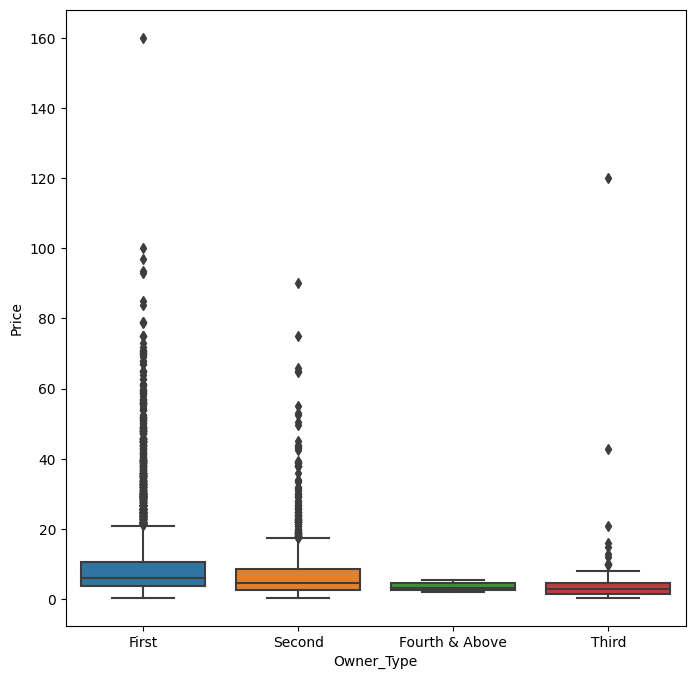

In [34]:
data = pd.concat([df['Price'], df['Owner_Type']], axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x='Owner_Type', y="Price", data=data)

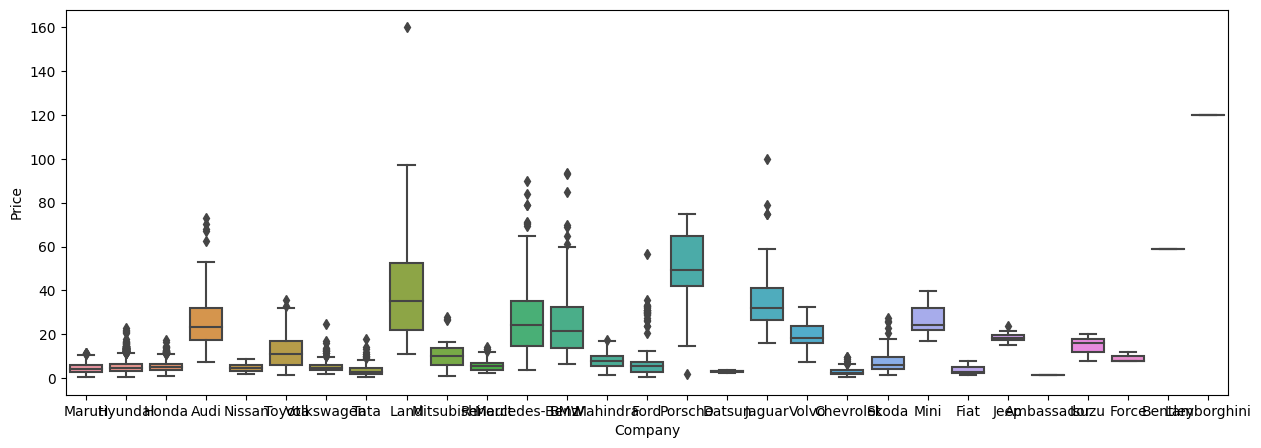

In [35]:
data = pd.concat([df['Price'], df['Company']], axis=1)
f, ax = plt.subplots(figsize=(15,5))
fig = sns.boxplot(x='Company', y="Price", data=data)

<Axes: >

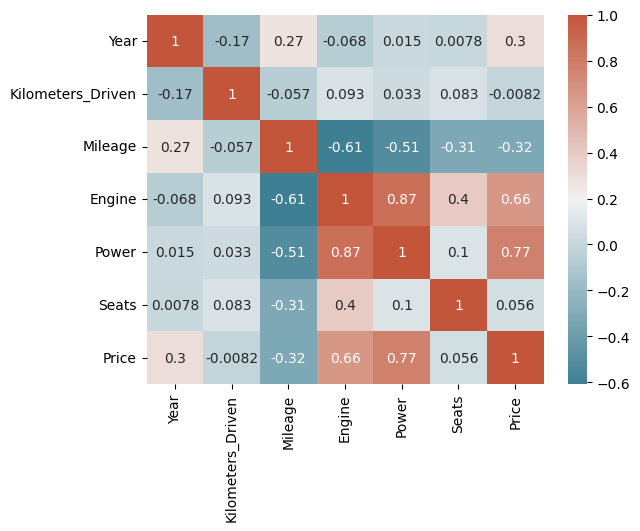

In [36]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

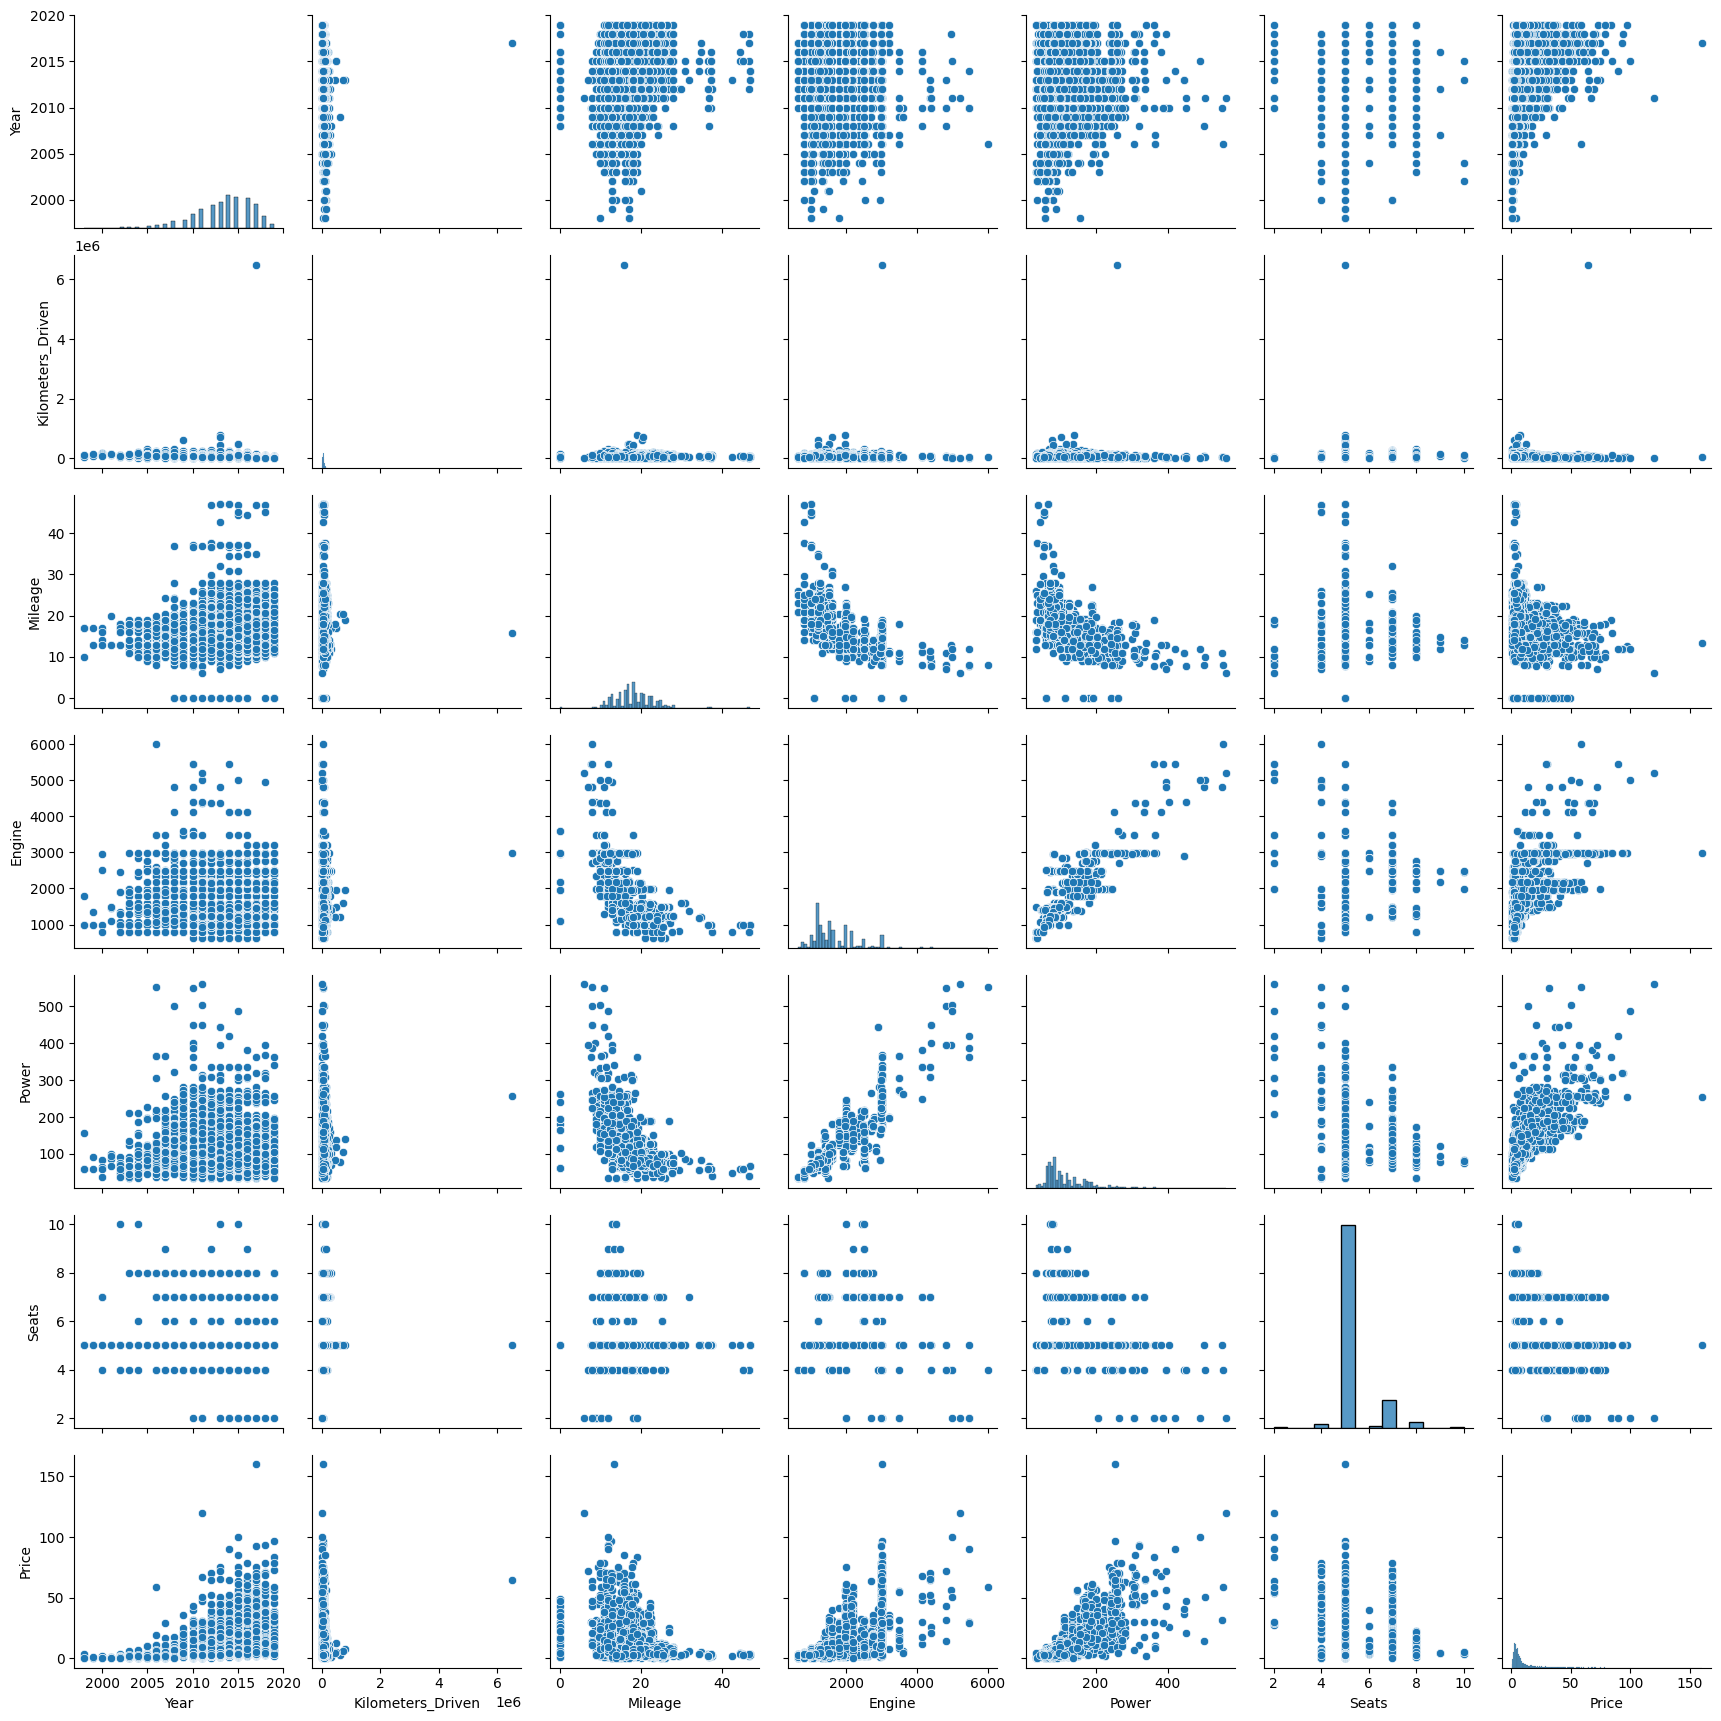

In [83]:
sns.pairplot(df)

In [38]:
df_final = pd.get_dummies(df)
print(sorted(df_final.columns))

['Company_Ambassador', 'Company_Audi', 'Company_BMW', 'Company_Bentley', 'Company_Chevrolet', 'Company_Datsun', 'Company_Fiat', 'Company_Force', 'Company_Ford', 'Company_Honda', 'Company_Hyundai', 'Company_Isuzu', 'Company_Jaguar', 'Company_Jeep', 'Company_Lamborghini', 'Company_Land', 'Company_Mahindra', 'Company_Maruti', 'Company_Mercedes-Benz', 'Company_Mini', 'Company_Mitsubishi', 'Company_Nissan', 'Company_Porsche', 'Company_Renault', 'Company_Skoda', 'Company_Tata', 'Company_Toyota', 'Company_Volkswagen', 'Company_Volvo', 'Engine', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Kilometers_Driven', 'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Mileage', 'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Power', 'Price', 'Seats', 'Transmission

In [39]:
df_final.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,2010,72000,37.24,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.60,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.00,1199.0,88.70,5.0,4.50,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.70,1248.0,88.76,7.0,6.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.00,1968.0,140.80,5.0,17.74,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_final.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Company_Ambassador',
       'Company_Audi', 'Company_BMW', 'Company_Bentley', 'Company_Chevrolet',
       'Company_Datsun', 'Company_Fiat', 'Company_Force', 'Company_Ford',
       'Company_Honda', 'Company_Hyundai', 'Company_Isuzu', 'Company_Jaguar',
       'Company_Jeep', 'Company_Lamborghini', 'Company_Land',
       'Company_Mahindra', 'Company_Maruti', 'Company_Mercedes-Benz',
       'Company_Mini', 'Company_Mitsubishi', 'Comp

In [41]:
X_head = df_final.iloc[:, df_final.columns != 'Price']
X = df_final.loc[:, df_final.columns != 'Price']
y = df_final['Price']
#X = StandardScaler().fit_transform(X)
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5867     4.75
5868     4.00
5869     2.90
5870     2.65
5871     2.50
Name: Price, Length: 5872, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [43]:
#Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print("R2 of training set: ",linear_reg.score(X_train,y_train))
print("R2 of testing set: ",linear_reg.score(X_test,y_test))

R2 of training set:  0.7750698475424368
R2 of testing set:  0.7792260076208282


In [44]:
#decision tree
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
print("R2 of training set: ",dt_regressor.score(X_train,y_train))
print("R2 of testing set: ",dt_regressor.score(X_test,y_test))

R2 of training set:  0.9999842405787758
R2 of testing set:  0.8447797320636944


In [45]:
#Random forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
print("R2 of training set: ",rf_regressor.score(X_train,y_train))
print("R2 of testing set: ",rf_regressor.score(X_test,y_test))

R2 of training set:  0.9830561249171711
R2 of testing set:  0.9130876479067922


In [46]:
#Extra trees regressor
et_regressor = ExtraTreesRegressor()
et_regressor.fit(X_train, y_train)
print("R2 of training set: ",et_regressor.score(X_train,y_train))
print("R2 of testing set: ",et_regressor.score(X_test,y_test))

R2 of training set:  0.9999842405787758
R2 of testing set:  0.9130731834627835


In [47]:
#XG Boost
xgb_regressor = xg.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
print("R2 of training set: ",xgb_regressor.score(X_train,y_train))
print("R2 of testing set: ",xgb_regressor.score(X_test,y_test))

R2 of training set:  0.9956244799936745
R2 of testing set:  0.9200935289860772


<Axes: >

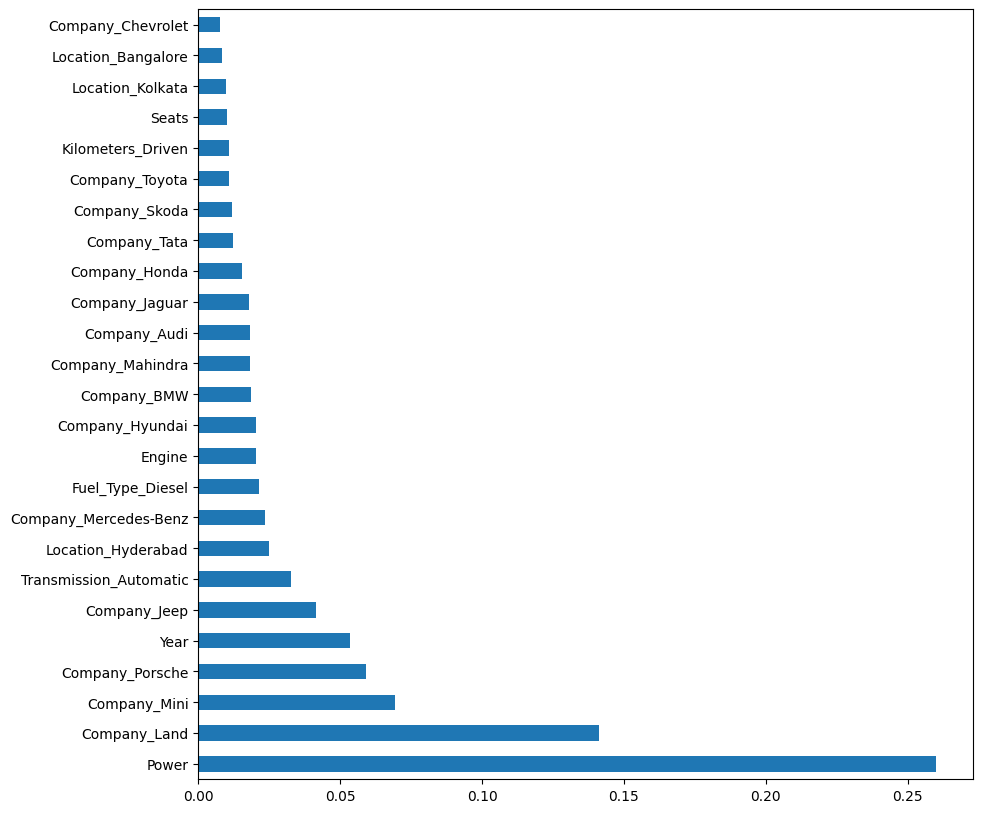

In [48]:
feat_importances = pd.Series(xgb_regressor.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [49]:
#pickle.dump(xgb_regressor, open('model.pkl', 'wb'))

In [50]:
df_final.shape

(5872, 57)

In [76]:

xt = X_test.reset_index(drop=True)
xt=xt.iloc[0]
#xt
#xt.shape

In [84]:
input=np.array(xt)

input=input.reshape(1,-1)
input
input.shape
# #input=input.reshape(-1,1)
with open("model1.pkl", "rb") as f:
  clf  = pickle.load(f)
  pred= clf.predict(input)
print(pred)

[1.5063432]
